# **Cluster exploration**

*placeholer for informational input*

Later on in learning platform:  
Other interesting tasks you might want to perform in terms of cluster exploration include:  
* Looking at the size of the clusters (how many observations do they have?)
* Plotting the distribution of an individual feature (such as “energy”) across different clusters.
* Visualizing the clusters in a scatterplot with two different features.
* Listening to a few songs from each cluster to get a feeling for what do these clusters contain.

## **1. Import:**

In [15]:
# Modules:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
# .csv:
df1000songs = pd.read_csv(r'1000songs.csv')
df1000min_max = pd.read_csv(r'1000min_max.csv')
df1000power = pd.read_csv(r'1000power.csv')
df1000quantile = pd.read_csv(r'1000quantile.csv')
df1000robust = pd.read_csv(r'1000robust.csv')
df1000standart = pd.read_csv(r'1000standart.csv')
# 5000 songs:
df5000songs = pd.read_csv(r'5000songs.csv')
df5000min_max = pd.read_csv(r'5000min_max.csv')
df5000power = pd.read_csv(r'5000power.csv')
df5000quantile = pd.read_csv(r'5000quantile.csv')
df5000robust = pd.read_csv(r'5000robust.csv')
df5000standart = pd.read_csv(r'5000standart.csv')


In [16]:
# df1000songs.sample(1) # Just to see order of columns again :)


## **2. K-Means on unscaled Dataframe:**
I would suggest 5 n_clusters for 1000 songs here, since our "bosses" tell us to have like 200-250 songs per cluster.  
With the larger dataset we can work with 250 songs. Read LMS 6.5 and 6.6 for deeper understanding.  

### **2.1 K-Means on 2 columns:**

In [17]:
# To get used to the "raw numbers":
df1000songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,time_signature,valence,tempo
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.538917,0.494241,5.154861,-11.098032,0.663194,0.086273,0.469774,0.188482,0.174391,3.889583,0.472576,115.249066
std,0.219193,0.281917,3.540932,6.979107,0.472782,0.086193,0.374637,0.336594,0.146007,0.446937,0.287807,31.611805
min,0.059600,0.000020,0.000000,-44.406000,0.000000,0.023200,0.000002,0.000000,0.020700,1.000000,0.019600,49.689000
25%,0.386000,0.243000,2.000000,-14.927250,0.000000,0.038400,0.083025,0.000000,0.090700,4.000000,0.214750,91.014250
50%,0.562000,0.529500,5.000000,-8.939500,1.000000,0.048200,0.419000,0.000127,0.118000,4.000000,0.476500,110.008000
75%,0.710250,0.733000,8.000000,-5.677250,1.000000,0.088825,0.869250,0.159750,0.203000,4.000000,0.720000,135.587000
max,0.964000,0.996000,11.000000,1.085000,1.000000,0.576000,0.996000,0.985000,0.985000,5.000000,0.985000,206.313000


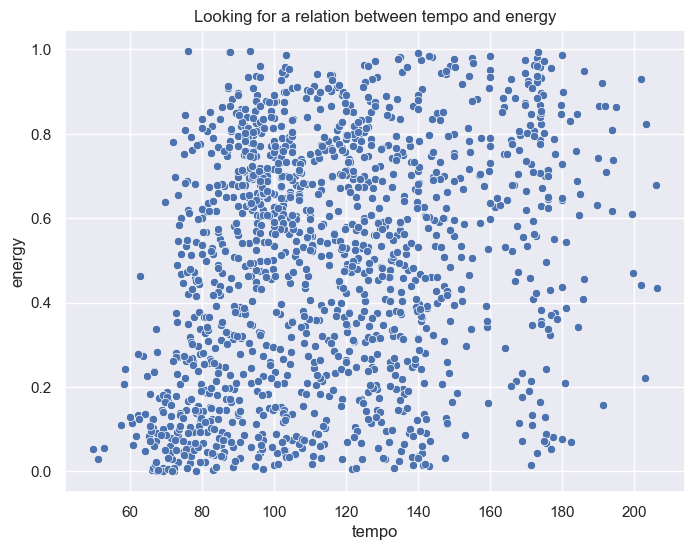

In [18]:
# Simple plot of maybe related numbers:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df1000songs, x='tempo', y='energy')
plt.title('Looking for a relation between tempo and energy')
plt.show()

In [19]:
# Applying KMean on it:
kmean_test = df1000songs[['energy','tempo']]
test_model = KMeans(n_clusters=5)
test_model.fit(kmean_test)
test_model.cluster_centers_
# Making another df out of it:
model_centroids = pd.DataFrame(test_model.cluster_centers_)
model_centroids.columns = ['energy','tempo']
model_centroids

C:\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,energy,tempo
0,0.625946,174.532190
1,0.299276,76.965023
2,0.525173,120.733170
3,0.508067,141.515004
4,0.548264,98.066477


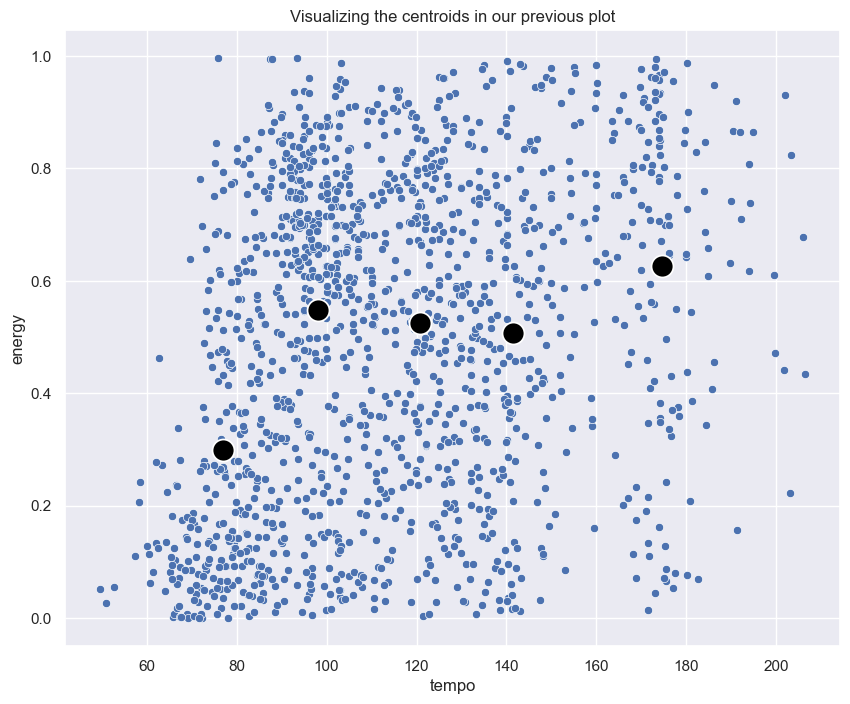

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Visualizing the centroids in our previous plot')
plt.xlabel('tempo')
plt.ylabel('energy')
sns.scatterplot(data=kmean_test, x='tempo', y='energy')
sns.scatterplot(data=model_centroids, x='tempo', y='energy', color='black', s=250, alpha=1)
plt.show()

C:\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


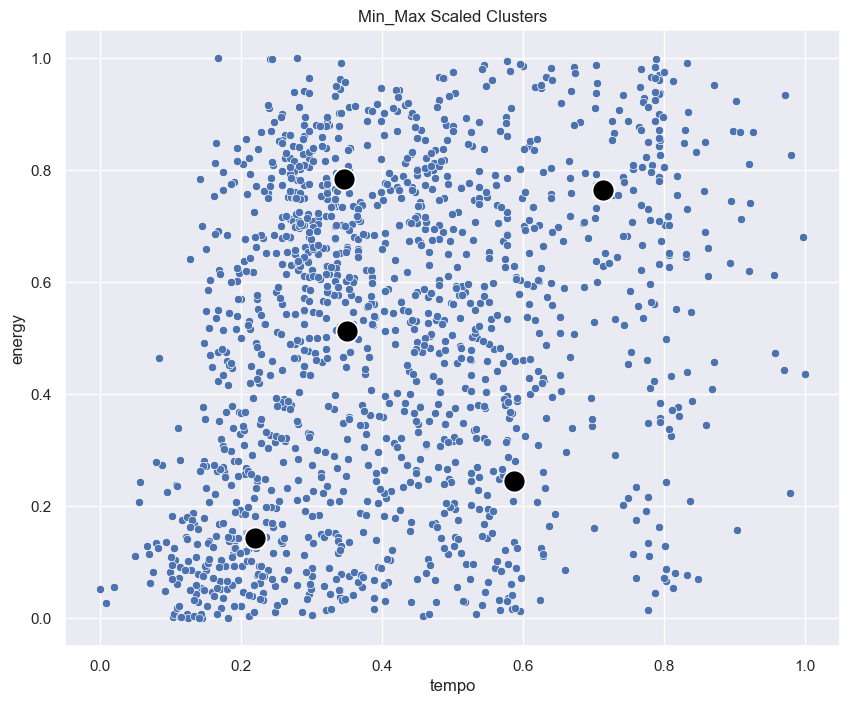

In [21]:
# Playing with scaled df:
kmean_test2 = df1000min_max[['energy','tempo']]
test_model2 = KMeans(n_clusters=5)
test_model2.fit(kmean_test2)
test_model2.cluster_centers_
model_centroids2 = pd.DataFrame(test_model2.cluster_centers_)
model_centroids2.columns = ['energy','tempo']
model_centroids2

fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Min_Max Scaled Clusters')
plt.xlabel('tempo')
plt.ylabel('energy')
sns.scatterplot(data=kmean_test2, x='tempo', y='energy')
sns.scatterplot(data=model_centroids2, x='tempo', y='energy', color='black', s=250, alpha=1)
plt.show()

C:\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


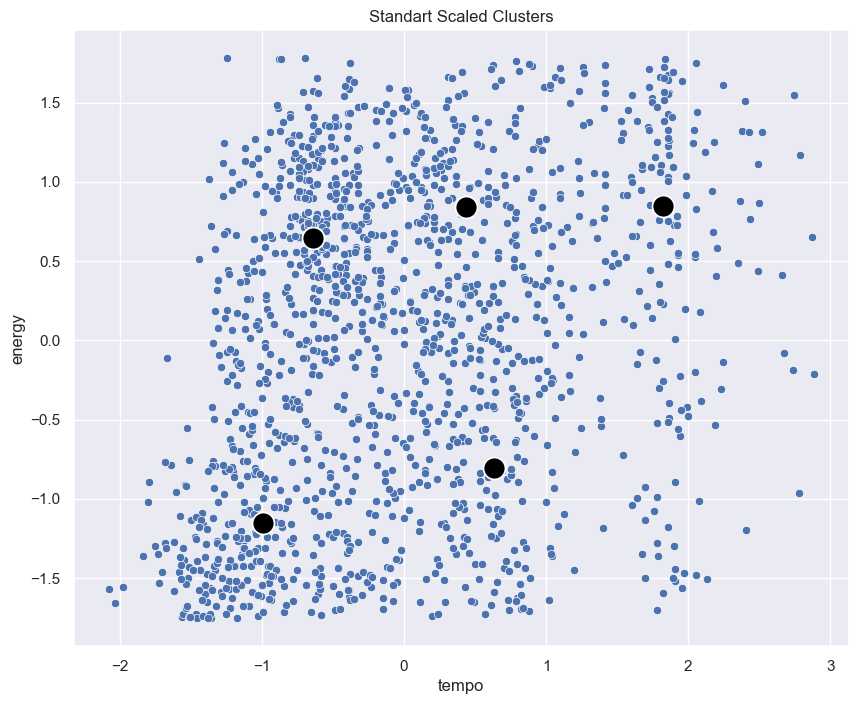

In [22]:
# Playing with scaled df:
kmean_test3 = df1000standart[['energy','tempo']]
test_model3 = KMeans(n_clusters=5)
test_model3.fit(kmean_test3)
test_model3.cluster_centers_
model_centroids3 = pd.DataFrame(test_model3.cluster_centers_)
model_centroids3.columns = ['energy','tempo']
model_centroids3

fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Standart Scaled Clusters')
plt.xlabel('tempo')
plt.ylabel('energy')
sns.scatterplot(data=kmean_test3, x='tempo', y='energy')
sns.scatterplot(data=model_centroids3, x='tempo', y='energy', color='black', s=250, alpha=1)
plt.show()

C:\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


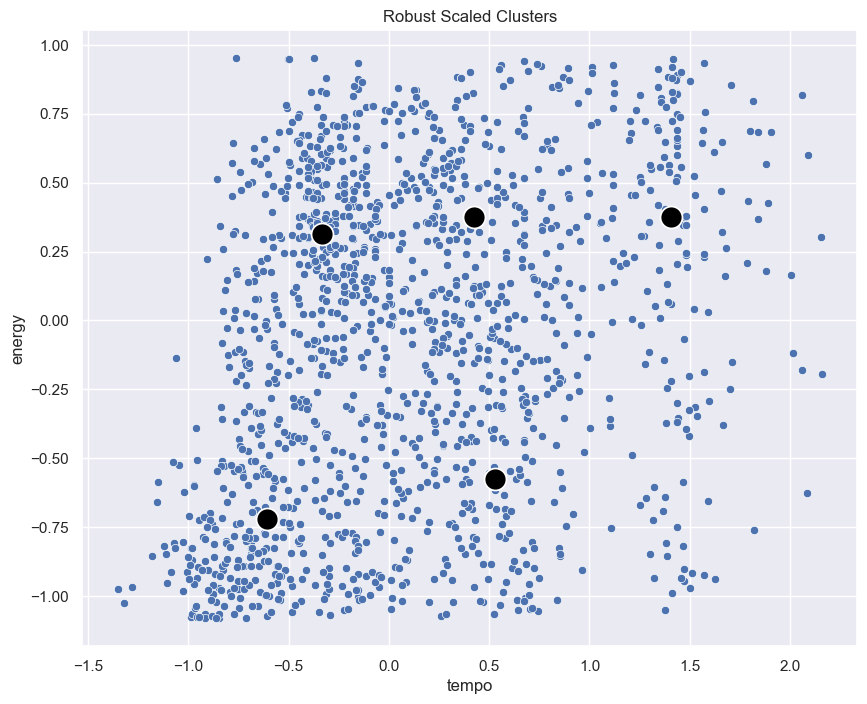

In [23]:
# Playing with scaled df:
kmean_test4 = df1000robust[['energy','tempo']]
test_model4 = KMeans(n_clusters=5)
test_model4.fit(kmean_test4)
test_model4.cluster_centers_
model_centroids4 = pd.DataFrame(test_model4.cluster_centers_)
model_centroids4.columns = ['energy','tempo']
model_centroids4

fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Robust Scaled Clusters')
plt.xlabel('tempo')
plt.ylabel('energy')
sns.scatterplot(data=kmean_test4, x='tempo', y='energy')
sns.scatterplot(data=model_centroids4, x='tempo', y='energy', color='black', s=250, alpha=1)
plt.show()

C:\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


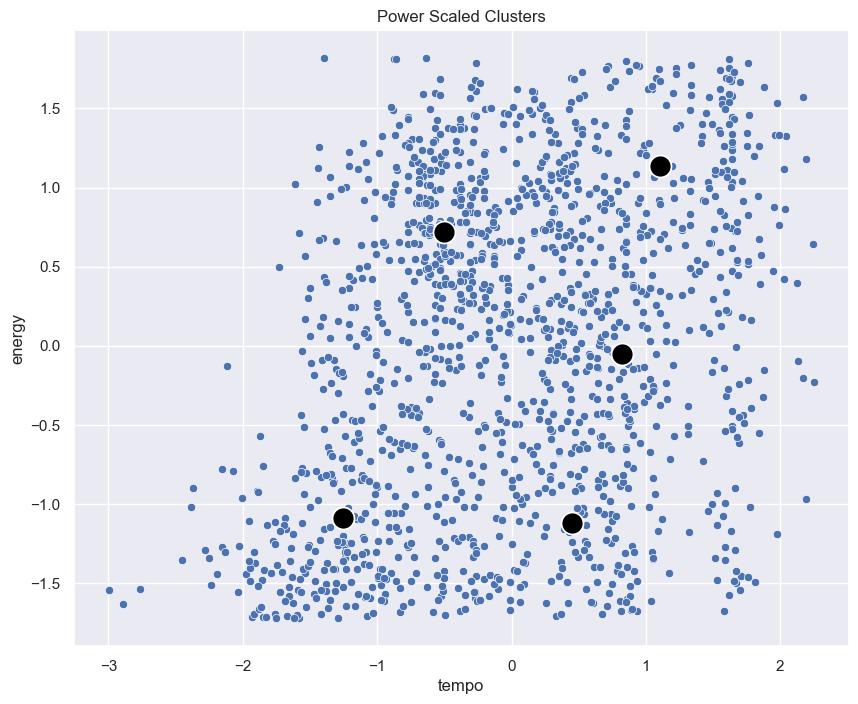

In [24]:
# Playing with scaled df:
kmean_test5 = df1000power[['energy','tempo']]
test_model5 = KMeans(n_clusters=5)
test_model5.fit(kmean_test5)
test_model5.cluster_centers_
model_centroids5 = pd.DataFrame(test_model5.cluster_centers_)
model_centroids5.columns = ['energy','tempo']
model_centroids5

fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Power Scaled Clusters')
plt.xlabel('tempo')
plt.ylabel('energy')
sns.scatterplot(data=kmean_test5, x='tempo', y='energy')
sns.scatterplot(data=model_centroids5, x='tempo', y='energy', color='black', s=250, alpha=1)
plt.show()

C:\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


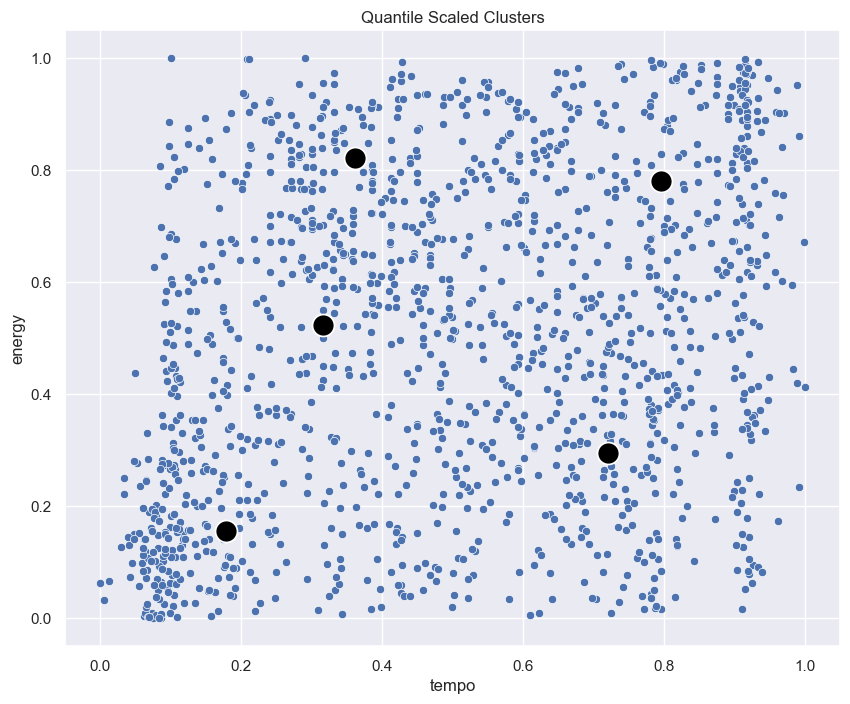

In [25]:
# Playing with scaled df:
kmean_test6 = df1000quantile[['energy','tempo']]
test_model6 = KMeans(n_clusters=5)
test_model6.fit(kmean_test6)
test_model6.cluster_centers_
model_centroids6 = pd.DataFrame(test_model6.cluster_centers_)
model_centroids6.columns = ['energy','tempo']
model_centroids6

fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Quantile Scaled Clusters')
plt.xlabel('tempo')
plt.ylabel('energy')
sns.scatterplot(data=kmean_test6, x='tempo', y='energy')
sns.scatterplot(data=model_centroids6, x='tempo', y='energy', color='black', s=250, alpha=1)
plt.show()

## **3. Inertia and Silhouette Score:**

### **3.1 Inertia:**

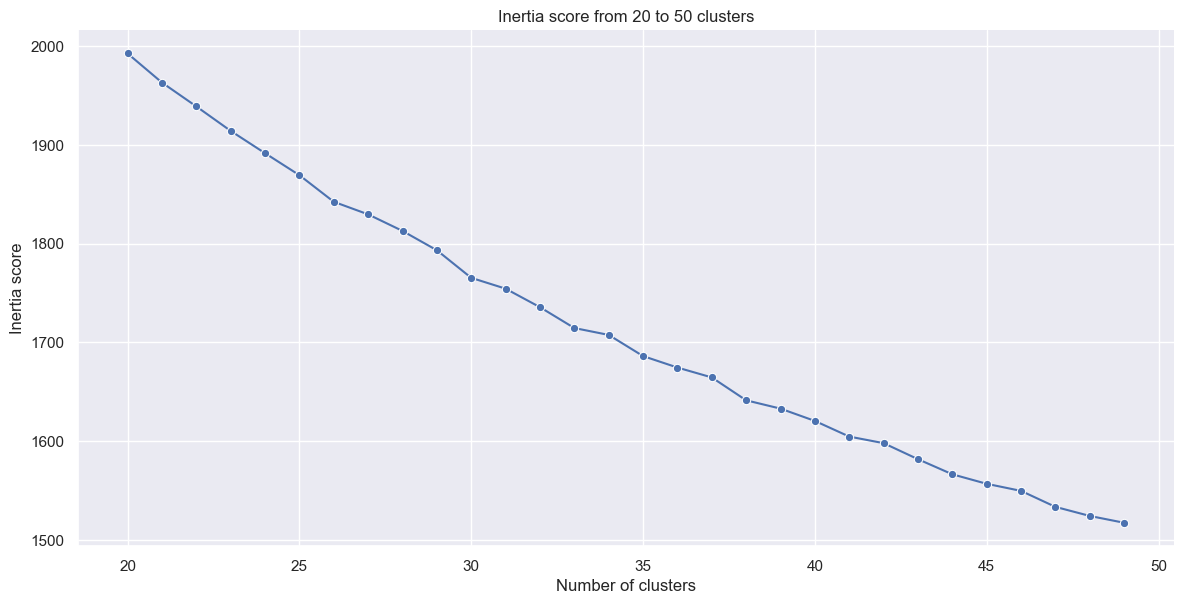

In [32]:
# Calculating inertia for Quantile-Scaled
#df5000quantile.set_index('title', inplace=True) 
max_clusters = 50

inertia_list_st = []

for i in range(20,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(df5000quantile)
  inertia_list_st.append(round(model_loop.inertia_,3))

# print(inertia_list_st) # to see if it worked 

#Elbowmethod
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(20,max_clusters),y=inertia_list_st,marker='o',height=6,aspect=2)
    .set(title=f"Inertia score from 20 to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Inertia score")
);

### **3.2 Silhouette:**

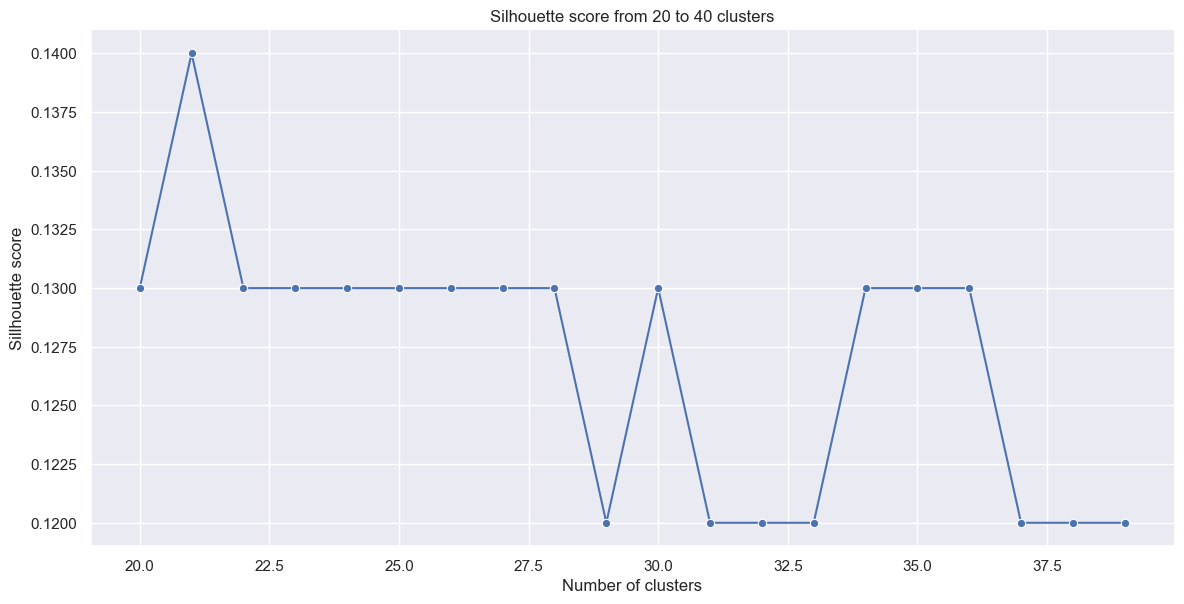

In [29]:
# Same for Silhouette:
max_clusters = 40

silhouette_list = []

for i in range(20,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(df5000quantile)
  score = silhouette_score(df5000quantile,model_loop.labels_)
  silhouette_list.append(round(score,2))
  
# Visualized:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(20,max_clusters),y=silhouette_list,marker='o',height=6,aspect=2)
    .set(title=f"Silhouette score from 20 to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Sillhouette score")
);

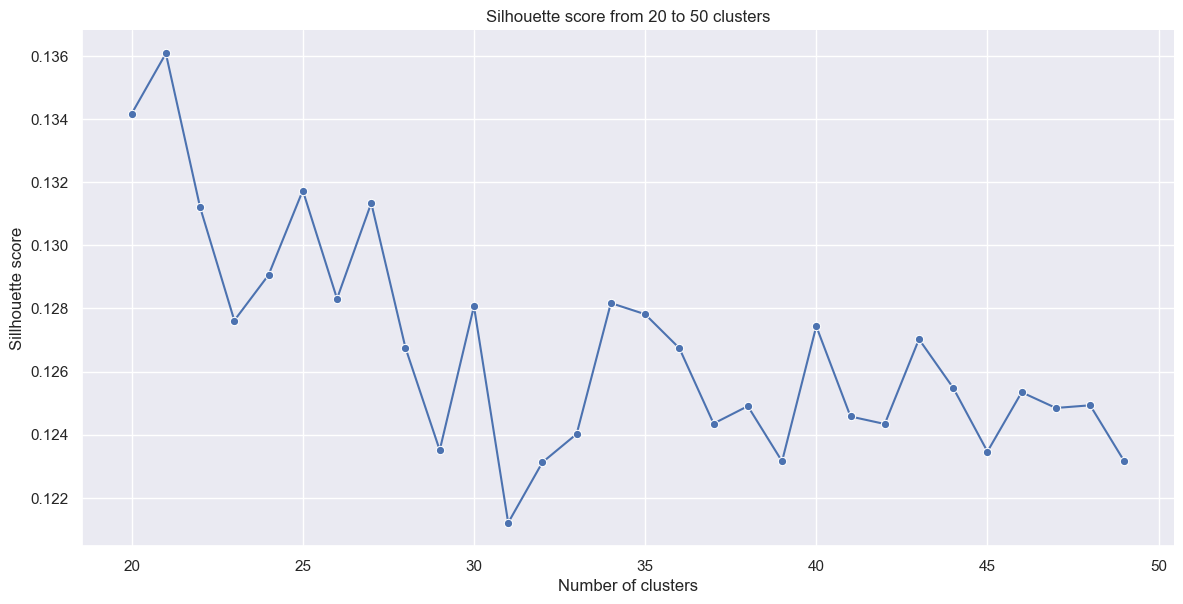

In [31]:
max_clusters = 50

silhouette_list = []

for i in range(20,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(df5000quantile)
  score = silhouette_score(df5000quantile,model_loop.labels_)
  silhouette_list.append(round(score,8))
  
# Visualized:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(20,max_clusters),y=silhouette_list,marker='o',height=6,aspect=2)
    .set(title=f"Silhouette score from 20 to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Sillhouette score")
 );

## **4. Adding 40 Cluster on Scaled dataframe to then output in a new .csv for Modelling:**

### **4.1 As in 4.:**

In [13]:
# copying to not mess up...
scaled_clustered_5000songs = df5000quantile.copy()
# 40 clusters
final_model = KMeans(n_clusters=40, random_state=123)
final_model.fit(df5000quantile)
# Labelling
scaled_clustered_5000songs['cluster']  = final_model.labels_
# scaled_clustered_5000songs.sample(5) # see if it worked
# output csv
scaled_clustered_5000songs.to_csv('final5000.csv')


C:\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### **4.2 Additional Heatmap for comparison:**

<AxesSubplot:>

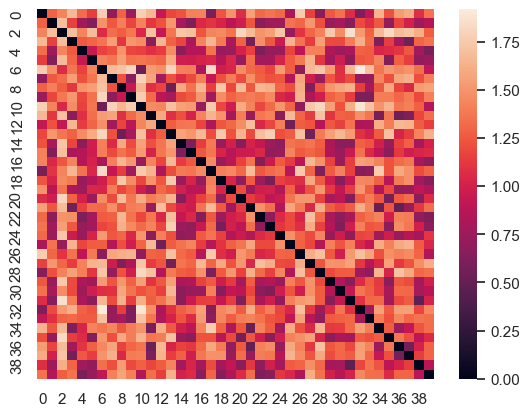

In [14]:
distances_centroids = pairwise_distances(final_model.cluster_centers_)
sns.heatmap(distances_centroids)